In [10]:
from ogb.graphproppred import GraphPropPredDataset

import networkx as nx
import numpy as np

In [11]:
dataset = GraphPropPredDataset(name = 'ogbg-molhiv')

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]

In [12]:
i = 2

graph, label = dataset[i] # graph: library-agnostic graph object

In [13]:
graph.keys()

dict_keys(['edge_index', 'edge_feat', 'node_feat', 'num_nodes'])

In [14]:
feature_names = [
    'atomic_num',
    'chirality',
    'degree',
    'formal_charge',
    'num_h',
    'num_rad_e',
    'hybridization',
    'is_aromatic',
    'is_in_ring',
]

In [15]:
def graph_dict_to_nx_graph(graph_dict: dict):
    """
    Constructs a NetworkX graph object from the given graph dictionary.

    Args:
        graph_dict: A dictionary representing a graph, with the following keys:
            - 'num_nodes': The number of nodes in the graph.
            - 'node_feat': A list of node features, with one feature vector per node.
            - 'edge_index': An edge index array of shape (2, E), where E is the number of edges.
            - 'edge_feat': A list of edge features, with one feature vector per edge.

    Returns:
        A NetworkX graph object with nodes and edges corresponding to the input graph.
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(graph_dict['num_nodes']))

    for node_number, features in enumerate(graph_dict['node_feat']):
        graph.add_node(node_number)
        for k, v in zip(feature_names, features):
            graph.nodes[node_number][k] = v

    # change shape from (2, E) to (E, 2)
    edge_list = np.transpose(graph_dict['edge_index'])
    for node_number, (from_node, to_node) in enumerate(edge_list):
        features = graph_dict['edge_feat'][node_number]
        graph.add_edge(from_node, to_node, feature=features)

    return graph

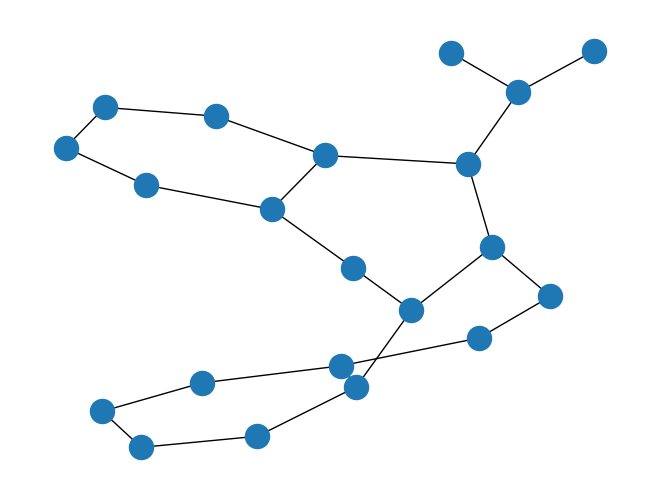

In [16]:
nx_graph = graph_dict_to_nx_graph(graph)

nx.draw(nx_graph)

In [17]:
nx_graph.nodes[0]

{'atomic_num': 5,
 'chirality': 0,
 'degree': 4,
 'formal_charge': 5,
 'num_h': 3,
 'num_rad_e': 0,
 'hybridization': 2,
 'is_aromatic': 0,
 'is_in_ring': 0}

In [18]:
G = nx_graph

In [19]:
path = dict(nx.all_pairs_shortest_path(G))
path

{0: {0: [0],
  1: [0, 1],
  2: [0, 1, 2],
  3: [0, 1, 3],
  4: [0, 1, 3, 4],
  12: [0, 1, 3, 12],
  5: [0, 1, 3, 4, 5],
  9: [0, 1, 3, 4, 9],
  11: [0, 1, 3, 12, 11],
  13: [0, 1, 3, 12, 13],
  6: [0, 1, 3, 4, 5, 6],
  8: [0, 1, 3, 4, 9, 8],
  10: [0, 1, 3, 4, 9, 10],
  20: [0, 1, 3, 12, 11, 20],
  14: [0, 1, 3, 12, 13, 14],
  7: [0, 1, 3, 4, 5, 6, 7],
  19: [0, 1, 3, 12, 11, 20, 19],
  15: [0, 1, 3, 12, 11, 20, 15],
  18: [0, 1, 3, 12, 11, 20, 19, 18],
  16: [0, 1, 3, 12, 11, 20, 15, 16],
  17: [0, 1, 3, 12, 11, 20, 19, 18, 17]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  4: [1, 3, 4],
  12: [1, 3, 12],
  5: [1, 3, 4, 5],
  9: [1, 3, 4, 9],
  11: [1, 3, 12, 11],
  13: [1, 3, 12, 13],
  6: [1, 3, 4, 5, 6],
  8: [1, 3, 4, 9, 8],
  10: [1, 3, 4, 9, 10],
  20: [1, 3, 12, 11, 20],
  14: [1, 3, 12, 13, 14],
  7: [1, 3, 4, 5, 6, 7],
  19: [1, 3, 12, 11, 20, 19],
  15: [1, 3, 12, 11, 20, 15],
  18: [1, 3, 12, 11, 20, 19, 18],
  16: [1, 3, 12, 11, 20, 15, 16],
  17: [1, 3, 12, 11, 2

In [20]:
shortest_paths = []

for from_vertex in path.keys():
    for to_vertex in path[from_vertex]:
        if from_vertex != to_vertex:
            shortest_paths.append(path[from_vertex][to_vertex])

In [30]:
nx_graph.nodes[0]['atomic_num']

5

In [33]:
sentences = []

for shortest_path in shortest_paths:
    sentence = " ".join([str(nx_graph.nodes[vertex]['atomic_num']) for vertex in shortest_path])
    print(sentence)

5 5
5 5 7
5 5 6
5 5 6 5
5 5 6 5
5 5 6 5 5
5 5 6 5 5
5 5 6 5 5
5 5 6 5 5
5 5 6 5 5 5
5 5 6 5 5 5
5 5 6 5 5 15
5 5 6 5 5 5
5 5 6 5 5 5
5 5 6 5 5 5 5
5 5 6 5 5 5 5
5 5 6 5 5 5 5
5 5 6 5 5 5 5 5
5 5 6 5 5 5 5 5
5 5 6 5 5 5 5 5 5
5 5
5 7
5 6
5 6 5
5 6 5
5 6 5 5
5 6 5 5
5 6 5 5
5 6 5 5
5 6 5 5 5
5 6 5 5 5
5 6 5 5 15
5 6 5 5 5
5 6 5 5 5
5 6 5 5 5 5
5 6 5 5 5 5
5 6 5 5 5 5
5 6 5 5 5 5 5
5 6 5 5 5 5 5
5 6 5 5 5 5 5 5
7 5
7 5 5
7 5 6
7 5 6 5
7 5 6 5
7 5 6 5 5
7 5 6 5 5
7 5 6 5 5
7 5 6 5 5
7 5 6 5 5 5
7 5 6 5 5 5
7 5 6 5 5 15
7 5 6 5 5 5
7 5 6 5 5 5
7 5 6 5 5 5 5
7 5 6 5 5 5 5
7 5 6 5 5 5 5
7 5 6 5 5 5 5 5
7 5 6 5 5 5 5 5
7 5 6 5 5 5 5 5 5
6 5
6 5
6 5
6 5 5
6 5 7
6 5 5
6 5 5
6 5 5
6 5 5
6 5 5 5
6 5 5 5
6 5 5 15
6 5 5 5
6 5 5 5
6 5 5 5 5
6 5 5 5 5
6 5 5 5 5
6 5 5 5 5 5
6 5 5 5 5 5
6 5 5 5 5 5 5
5 6
5 5
5 5
5 6 5
5 6 5
5 5 5
5 5 5
5 5 15
5 6 5 5
5 6 5 7
5 6 5 5
5 6 5 5
5 5 5 5
5 6 5 5 5
5 6 5 5 5
5 6 5 5 5 5
5 6 5 5 5 5
5 6 5 5 5 5 5
5 6 5 5 5 5 5
5 6 5 5 5 5 5 5
5 5
5 5
5 5 6
5 5 5
5 5 5
5 5 6 5
5